<h1><center>EARTH 468: LAB01- Standard Error</center></h1>  

<h6>Submitted by: Prithvi Thakur</h6>
<h6>Email: prith@umich.edu</h6>

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import scipy.stats as stats
#from tabulate import tabulate
#from collections import Counter

<h3>(a) Plot Poisson PMF over range of values</h3>

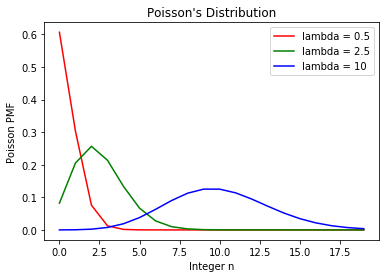

In [2]:
# Uniform integers
k = np.arange(0,20)

plt.plot(k, stats.poisson.pmf(k,0.5), 'r-', label = 'lambda = 0.5')
plt.plot(k, stats.poisson.pmf(k,2.5), 'g-', label = 'lambda = 2.5')
plt.plot(k, stats.poisson.pmf(k,10), 'b-', label = 'lambda = 10')
plt.title("Poisson's Distribution")
plt.legend(loc='upper right')
plt.xlabel("Integer n")
plt.ylabel("Poisson PMF")

plt.show()

<h3>(b) Generate 200 Poisson random numbers and plot histogram</h3>

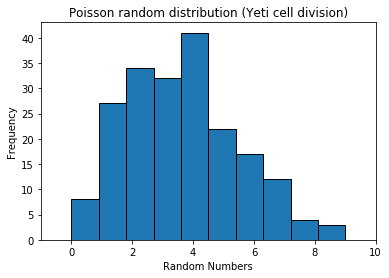

In [3]:
num = stats.poisson.rvs(3.4, size = 200)

# Plot histogram
plt.xlim([min(num)-1, max(num)+1])
plt.hist(num, edgecolor='black')
plt.title("Poisson random distribution (Yeti cell division)")
plt.xlabel("Random Numbers")
plt.ylabel("Frequency")

plt.show()

<h3>(c) Calculate the mean, sample s.d., and standard error</h3>

In [4]:
print("Mean = %.3f" %np.mean(num))
print("Expected cell divisions per day = 3.4 (Given)")
print("Sample standard deviation = %.3f" %np.std(num))
print("Standard error = %.3f" %stats.sem(num))

Mean = 3.550
Expected cell divisions per day = 3.4 (Given)
Sample standard deviation = 2.044
Standard error = 0.145


<h3>(d) Repeat the experiment 6 times</h3>

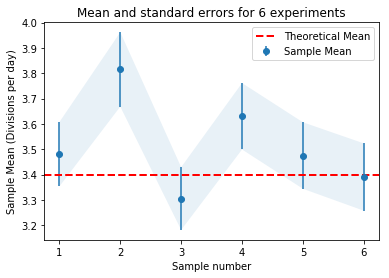

In [5]:
# List of 6 arrays: Each array has size 200
num6 = np.array([stats.poisson.rvs(3.4, size = 200) for x in range(6)])

# Mean of each sample
mean_ = np.mean(num6, axis = 1)

# Standard error of each sample
std_err = stats.sem(num6, axis = 1)

# Plot the mean and standard errors
plt.errorbar(np.arange(1,7,1), mean_, yerr = std_err, marker = 'o',\
             ls = 'none', label = 'Sample Mean')

plt.fill_between(np.arange(1,7,1), mean_+std_err, mean_-std_err, alpha = 0.1)

plt.axhline(3.4, color='r', linestyle='dashed', linewidth=2, label = 'Theoretical Mean')

plt.title("Mean and standard errors for 6 experiments")
plt.legend(loc = 'upper right')
plt.xlabel("Sample number")
plt.ylabel("Sample Mean (Divisions per day)")

plt.show()

<h3>(e) Compare mean and sample s.d. instead of standard error</h3>

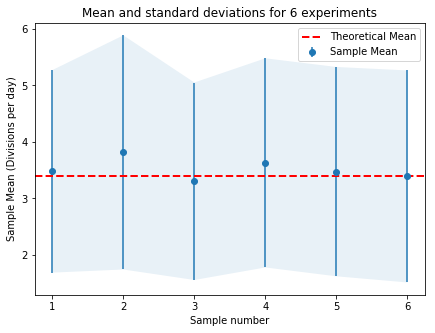

In [6]:
# Plot the mean and standard deviations

# Standard deviation of each sample
std_dev = np.std(num6, axis=1)

# Initialize a figure
fig = plt.figure(figsize=(7,5))

# Add subplot to the figure
ax = fig.add_subplot(111)

# Plot the mean and standard deviation as errorbars
ax.errorbar(np.arange(1,7,1), mean_, yerr = std_dev, marker = 'o',\
             ls = 'none', label = 'Sample Mean')

# Fill in the errorbars with opacity 0.1
ax.fill_between(np.arange(1,7,1), mean_ + std_dev, mean_- std_dev, alpha = 0.1)

ax.axhline(3.4, color='r', linestyle='dashed', linewidth=2, label = 'Theoretical Mean')

ax.set_title("Mean and standard deviations for 6 experiments")
ax.legend(loc = 'upper right')
ax.set_xlabel("Sample number")
ax.set_ylabel("Sample Mean (Divisions per day)")

plt.show()

<h6>Based on the above two plots, it is clear that plotting the standard error is more robust because the standard error is normalized with the sample size. The standard deviation is similar for all the samples, which makes it difficult to compare.</h6>  


<h3>(f) Repeat the experiments much larger number of times</h3>

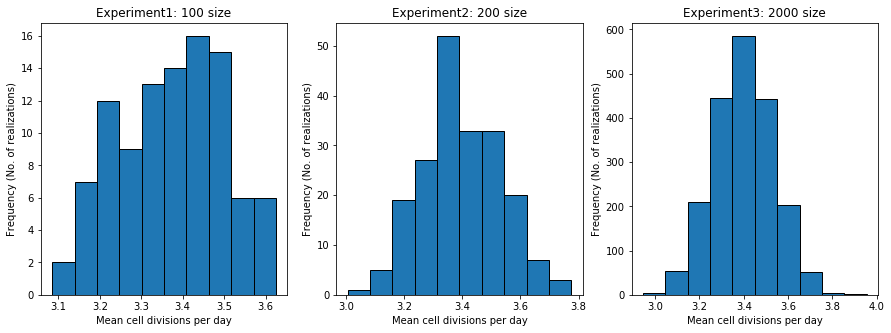

In [7]:
# EXPERIMENT 1: List of 100 arrays: Each array has size 200
#num1 = np.zeros((200,100))
num1 = np.array([stats.poisson.rvs(3.4, size = 200) for x in range(100)])

# EXPERIMENT 2: List of 200 arrays: Each array has size 200
num2 = np.zeros((200,200))
num2 = np.array([stats.poisson.rvs(3.4, size = 200) for x in range(200)])

# EXPERIMENT 3: List of 2000 arrays: Each array has size 200
num3 = np.zeros((200,2000))
num3 = np.array([stats.poisson.rvs(3.4, size = 200) for x in range(2000)])


# Standard Error
std_err1 = stats.sem(num1, axis = 1)
std_err2 = stats.sem(num2, axis = 1) 
std_err3 = stats.sem(num3, axis = 1)

# Mean
mean_1 = np.mean(num1, axis = 1)
mean_2 = np.mean(num2, axis = 1)
mean_3 = np.mean(num3, axis = 1)


# PLOT HISTOGRAM FOR EACH EXPERIMENT

# Initialize figure
fig = plt.figure(figsize=(15,5))

# Initialize subplot
# 131 = 1 rows, 3 columns, and 1st position
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Plot Histogram
ax1.hist(mean_1, bins = 10, edgecolor = 'black')
ax1.set_title("Experiment1: 100 size")
ax1.set_xlabel("Mean cell divisions per day")
ax1.set_ylabel("Frequency (No. of realizations)")

ax2.hist(mean_2, bins = 10, edgecolor = 'black')
ax2.set_title("Experiment2: 200 size")
ax2.set_xlabel("Mean cell divisions per day")
ax2.set_ylabel("Frequency (No. of realizations)")


ax3.hist(mean_3, bins = 10, edgecolor = 'black')
ax3.set_title("Experiment3: 2000 size")
ax3.set_xlabel("Mean cell divisions per day")
ax3.set_ylabel("Frequency (No. of realizations)")


plt.show()

<h6> As we increase the number of realizations, we see that the histogram of mean becomes more and more gaussian.</h6>

<h3>(g) Compare the mean and standard deviation of part (f) and part (c)</h3>

In [8]:
# Mean and standard deviation of the 2000 realizations
mean_2000 = np.mean(mean_3)
std_2000 = np.std(mean_3)
sem_2000 = stats.sem(mean_3)

print("The mean of the 2000 realizations is: %.3f" %mean_2000)
print("The standard deviation of the 2000 realizations is: %.3f" %std_2000)
print("The standard error of 2000 realizations is: %.3f" %sem_2000)

print("\nThe mean in Part c is: %.3f" %np.mean(num))
print("The standard deviation in Part C is: %.3f" %np.std(num))
print("The standard error in Part C is: %.3f" %stats.sem(num))

The mean of the 2000 realizations is: 3.398
The standard deviation of the 2000 realizations is: 0.134
The standard error of 2000 realizations is: 0.003

The mean in Part c is: 3.550
The standard deviation in Part C is: 2.044
The standard error in Part C is: 0.145


The standard error represents how far the sample mean (with n=200) is from the population mean. We see that as we increase the number of experiments, the standard error of mean reduces significantly suggesting that we are closer to the population mean.